# exam1
- 1. 윤동주와 김소월의 시를 빈도분석하여 사용한 단어들의 종류에 어떠한 차이가 있는지를 살펴보시오
- 2. 워드 클라우드를 그리시오.
- 3. 어절과 형태소 단위로 통계 분석을 수행하시오
    - 다양한 그래프를 그리고 분석 결과를 해석하는 보고서를 작성

In [ ]:
from matplotlib import rc
rc('font', family='AppleGothic')

## 윤동주와 김소얼 시 빈도 분석

### 데이터를 어절, 형태소 단위 리스트 만들기

In [ ]:
import chardet
import rhinoMorph

path = '/Users/jsha/gjai/nlp/pytest/'
filename = '윤동주시.txt'
with open(path+filename, 'r') as f:
    yoon = f.readlines()
yoon = [sen.replace('\n', '') for sen in yoon]
yoon_sentence = [sen for sen in yoon if sen != ''] 

filename = '김소월시.txt'
with open(path+filename, 'r') as f:
    kim = f.readlines()
kim = [sen.replace('\n', '') for sen in kim]
kim_sentence = [sen for sen in kim if sen != ''] 

rn = rhinoMorph.startRhino()
yoon_morphs_list = []
for dat in yoon_sentence:
    yoon_morphed = rhinoMorph.onlyMorph_list(rn, dat, pos=['NNP', 'NNG',
                                'VV', 'VA', 'IC', 'XR', 'MM', 'MAG',
                                'MAJ'], eomi=True)
    yoon_morphs_list += yoon_morphed
yoon_eojul = [sen.split(' ') for sen in yoon_sentence]
yoon_eojul_list = [word for sen in yoon_eojul for word in sen] 

kim_morphs_list = []
for dat in kim_sentence:
    kim_morphed = rhinoMorph.onlyMorph_list(rn, dat, pos=['NNP', 'NNG',
                                'VV', 'VA', 'IC', 'XR', 'MM', 'MAG',
                                'MAJ'], eomi=True)
    kim_morphs_list += kim_morphed
kim_eojul = [sen.split(' ') for sen in kim_sentence]
kim_eojul_list = [word for sen in kim_eojul for word in sen] 


### 빈도 분석

In [ ]:
from collections import Counter
import pandas as pd

count = Counter(yoon_morphs_list)
key_list = []
value_list = []
ll = [[key, value] for key, value in count.items()]
df = pd.DataFrame(ll, columns=['morph', 'length'])
# print(df.head())
df_ordered = df.sort_values(by='length', ascending=False)
df_ordered.reset_index(drop=True, inplace=True)
# df_ordered['length'].dtype
df_ordered['ratio'] = df_ordered['length'].map(lambda x: f'{x / sum(df.length)*100:.2f}')
word = df_ordered.morph.to_list()
ratio = df_ordered.ratio.to_list()
tot_num = sum(df_ordered.length)

limnum = 10
print('윤동주 단어빈도 총합:', tot_num)
print('윤동주 고빈도 단어:', word[:limnum])
print('윤동주 고빈도 단어비율:', ratio[:limnum])
print('-'*70)
print('-'*70)
#-----------------------------------------------------------------

count = Counter(kim_morphs_list)
key_list = []
value_list = []
ll = [[key, value] for key, value in count.items()]
df = pd.DataFrame(ll, columns=['morph', 'length'])
# print(df.head())
df_ordered = df.sort_values(by='length', ascending=False)
df_ordered.reset_index(drop=True, inplace=True)
# df_ordered['length'].dtype
df_ordered['ratio'] = df_ordered['length'].map(lambda x: f'{x / sum(df.length)*100:.2f}')
word = df_ordered.morph.to_list()
ratio = df_ordered.ratio.to_list()
tot_num = sum(df_ordered.length)

limnum = 10
print('김소월 단어빈도 총합:', tot_num)
print('김소월 고빈도 단어:', word[:limnum])
print('김소월 고빈도 단어비율:', ratio[:limnum])

## Word Cloud 그리기

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

yoon_string = ' '.join(yoon_morphs_list)
yoon_cloud = WordCloud(font_path='malgun', 
                  width=800, height=600, 
                  background_color='white').generate(yoon_string)

kim_string = ' '.join(kim_morphs_list)
kim_cloud = WordCloud(font_path='malgun', 
                  width=800, height=600, 
                  background_color='white').generate(kim_string)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(121)
ax1.imshow(kim_cloud, interpolation='bilinear')
ax1.set_title('Kim')
plt.axis('off')

ax2 = fig.add_subplot(122)
ax2.imshow(yoon_cloud, interpolation='bilinear')
ax2.set_title('Yoon')
plt.axis('off')
plt.show()

## 어절 리스트, 형태소 리스트 통계분석하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

yoon_sentence_length_list = [len(sen.split(' ')) for sen in yoon_sentence]
kim_sentence_length_list = [len(sen.split(' ')) for sen in kim_sentence]

yoon_ss = pd.Series(yoon_sentence_length_list)
print('-'*30+'윤동주 시 통계분석 결과'+'-'*30)
print(yoon_ss.describe())
print(yoon_ss.quantile(0.95)) # max 12는 특이값에 가까움
print('-'*70)
print('-'*70)
print('-'*30+'김소월 시 통계분석 결과'+'-'*30)
kim_ss = pd.Series(kim_sentence_length_list)
print(kim_ss.describe())
print(kim_ss.quantile(0.95)) # max 12는 특이값에 가까움


In [ ]:
# 어절 수 boxplot
plt.figure(figsize=(10,8))
plt.boxplot(yoon_sentence_length_list, labels=['어절'])
plt.show()

In [ ]:
# 어절 수 분포 histplot
plt.figure(figsize=(10,8))
plt.hist(yoon_sentence_length_list, bins=50, label='어절 수')
plt.show()

# Exam 3 - 감성대화
- 감성대화말뭉치_validation.csv 파일을 읽고 다음을 수행하시오
    - 1. [사람문장 1/2/3/4] 컬럼을 pandas로 읽고, 결합
    - 2. 결측치가 있는 행은 제거
    - 3. 분류 항목(연령, 성별, 감정_대분류)에 따라 어떤 어휘적 특징이 있는지 조사 (품사 태그 선택에 유의)
- 앞뒤로 3~4인이 1조가 되어 분석 결과를 공유하고, 하나의 보고서를 만들어 발표 • 먼저개인별로분석하고,이후조별로분석결과공유

- 두 가지 가설을 세우자
    - 1. 청소년과 청년이 중년과 노년보다 어휘 중 IC(감탄사)의 비중이 높을 것이다. 
    - 2. 연령층별 기쁨의 감정과 슬픔의 감정을 대변하는 어휘를 찾고 그 이유에 대해 유추해 보자.

## 감성대화 말뭉치_validation.csv 파일 읽기 

In [1]:
# 한글 폰트 설정하기
from matplotlib import rc
rc('font', family='AppleGothic')

In [2]:
# 감성대화말뭉치 가져오기
import numpy as np
import pandas as pd

path = '/Users/jsha/gjai/nlp/pytest/'
file = '감성대화말뭉치(최종데이터)_Validation.xlsx'

df = pd.read_excel(path+file)

In [3]:
# 사람문장1/2/3/4을 합쳐서 sum_string으로 만들기
df.columns

human_df = df[df.columns[-8::2]].copy()

def func_sum(string):
    return ' '.join(string)
    
human_df.replace({np.nan:''}, inplace=True)
human_df.info()
human_df['sum_string'] = human_df.apply(func_sum, axis=1)
human_df.head()

df['sum_string'] = human_df.sum_string
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사람문장1   5130 non-null   object
 1   사람문장2   5130 non-null   object
 2   사람문장3   5130 non-null   object
 3   사람문장4   5130 non-null   object
dtypes: object(4)
memory usage: 160.4+ KB


,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4,sum_string
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀.,어떤 일로 부딪히시나요?,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,부모님과의 충돌로 힘드시겠군요.,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.,자신이 하고 싶은 일을 목표로 하기로 하셨군요.,NaN,NaN,요즘 부모님과 많이 부딪혀. 난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라...


In [4]:
# 결측치 행 제거
print(human_df.shape)
human_df.dropna(inplace=True)
print(human_df.shape)
human_df.head(2)

df.shape
df.dropna(subset=['sum_string'], inplace=True)
df.shape

(5130, 5)
(5130, 5)


(5130, 16)

## 가설검증1
- 가설: 청소년과 청년이 중년과 노년보다 어휘 중 IC(감탄사)의 비중이 높을 것이다. 
- 사용할 품사 태그: 9개의 모든 품사태그를 사용한다.
- 방법:
    - 연령별 전체 태그 대비 IC의 태그 비율을 확인해야 한다.
    - 1. 전체를 형태소 분석을 한다음(이때, 형태소와 pos를 모두 가져와야 해), 
    - 2. 연령별로 모으고,
    - 태그의 수를 센 다음,
    - 연령별로 비교한다.

In [5]:
# # method2
# new_df = pd.concat([human_df, df[classifier_columns]], 
#                    keys=human_df.index, join='inner', axis=1)
# new_df.shape

In [6]:
# 필요한 컬럼만 따로 떼어서 new_df를 만든다.
classifier_columns = ['연령', '성별', '감정_대분류', 'sum_string']

new_df = df[classifier_columns].copy()
print(new_df.shape)
new_df.dropna(inplace=True)
print(new_df.shape)

(5130, 4)
(5130, 4)


In [ ]:
# import rhinoMorph

# rn = rhinoMorph.startRhino()

# def func_morph(string):
#     morphs, poses = rhinoMorph.wholeResult_list(rn, string, pos=['NNP', 'NNG', 
#         'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True, xrVv=True)
# #     pos=['NNP', 'NNG', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
#     return morphs

# def func_poses(string):
#     morphs, poses = rhinoMorph.wholeResult_list(rn, string, pos=['NNP', 'NNG', 
#         'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True, xrVv=True)
# #     pos=['NNP', 'NNG', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
#     return poses

# # 연령별 나누기
# # 연령에 따른 어휘적 특징 분석
# age_df = new_df[['연령', 'sum_string']].copy()
# age_df['morphed'] = age_df['sum_string'].apply(func_morph)
# age_df['pos'] = age_df['sum_string'].apply(func_poses)

# age_list = age_df.연령.value_counts().index.to_list()
# age_morph_dict = {}
# for name in age_list:
#     result = age_df['morphed'][age_df['연령'] == name].to_list()
#     result = ' '.join(result)
#     age_morph_dict[name] = result

    
# from collections import Counter
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

# stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", 
#                 "사람", "이", "보다", " 한", "때", "년", "같다", "대하다", 
#                 "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다",
#                 " 받다", "그렇다", "알다", "사회", "더", "그녀", "문제", 
#                 "오다", "그리고", "크다", "속", "너무"]

# age_dict = {}
# numlim = 20
# for key, value in age_morph_dict.items():
#     dummy = value.split(' ')
# #     dummy = [val for val in dummy if val not in stopwords_ko]
#     age_dict[key] = pd.DataFrame(Counter(dummy).most_common(numlim),
#                                 columns=['morph', 'count'])

In [ ]:
new_df.head()

In [ ]:
# 형태소 분석과 pos new_df에 넣기
import rhinoMorph

rn = rhinoMorph.startRhino()

def func_morph(string):
    morphs = rhinoMorph.onlyMorph_list(rn, string, pos=['NNP', 'NNG', 
        'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True, xrVv=True)
#     pos=['NNP', 'NNG', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    return morphs

def func_poses(string):
    morphs, poses = rhinoMorph.wholeResult_list(rn, string, pos=['NNP', 'NNG', 
        'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True, xrVv=True)
#     pos=['NNP', 'NNG', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    return poses

# new_df에 morph와 pos 컬럼 넣기
new_df['morph'] = new_df['sum_string'].apply(func_morph)
new_df['pos'] = new_df['sum_string'].apply(func_poses)
    

In [ ]:
#연령별 morph와 pos 별 개수세기
from collections import Counter

new_df.head()
age_df = new_df.groupby(by='연령')['morph', 'pos'].sum()
age_df.head()

In [ ]:
youth_morph_df = pd.DataFrame(Counter(age_df.loc['청소년','morph']).most_common(20), 
                      columns=['morph', 'count'])
youth_pos_df = pd.DataFrame(Counter(age_df.loc['청소년','pos']).most_common(20), 
                      columns=['pos', 'count'])
fresh_pos_df = pd.DataFrame(Counter(age_df.loc['청년','pos']).most_common(20), 
                      columns=['pos', 'count'])
mid_pos_df = pd.DataFrame(Counter(age_df.loc['중년','pos']).most_common(20), 
                      columns=['pos', 'count'])
old_pos_df = pd.DataFrame(Counter(age_df.loc['노년','pos']).most_common(20), 
                      columns=['pos', 'count'])
result_dict = {'청소년':youth_pos_df, '청년':fresh_pos_df,
               '중년':mid_pos_df, '노년':old_pos_df}
result_dict

In [ ]:
dummy_list = []
key_list = []
for key, value in result_dict.items():
    value['ratio'] = value['count'].apply(lambda x: 
                    round(x/value['count'].sum(), 2))
    dum = value['ratio'][value['pos'] == 'IC'].to_list()
    dummy_list += dum
    key_list.append(key)
result_df = pd.DataFrame(np.array([key_list, dummy_list]).T, 
                         columns=['age', 'ratio'])
result_df['ratio'] = result_df['ratio'].astype(float)
sns.barplot(data=result_df, x='age', y='ratio')
plt.show()

### 결론: 연령별 IC의 비중 차이는 없다. 청년이나 청소년에서 더 높은 비율로 나타나거나 하지 않는다.

### 성별 형태소 분석하기

## 가설검증2
- 가설: 기쁨, 슬픔에 따라 연령별 사용하는 단어를 파악해 보자.
- 사용할 품사 태그: NNG, NNP, 2개를 제외한 7개를 사용한다.
- 방법:

In [104]:
# 형태소 분석과 pos new_df에 넣기
import rhinoMorph

rn = rhinoMorph.startRhino()
stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", 
                "사람", "이", "보다", " 한", "때", "년", "같다", "대하다", 
                "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다",
                " 받다", "그렇다", "알다", "사회", "더", "그녀", "문제", 
                "오다", "그리고", "크다", "속", "너무", '좋다', '정말', '잘']

def func_morph(string):
    morphs = rhinoMorph.onlyMorph_list(rn, string, pos=['VV', 'VA','XR', 'MM', 'MAG', 'MAJ'], eomi=True, xrVv=True)
#     pos=['NNP', 'NNG', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
# xrVv=True
    dummy = [val for val in morphs if val not in stopwords_ko]
    return dummy

# new_df에 morph와 pos 컬럼 넣기
new_df['morph'] = new_df['sum_string'].apply(func_morph)
    

filepath:  /Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages
classpath:  /Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [105]:
#연령별, 감정_대분류별 morph와 pos 별 개수세기
from collections import Counter

new_df.head()
joy_df = new_df[new_df['감정_대분류'] == '기쁨']
joy_df.head()
sad_df = new_df[new_df['감정_대분류'] == '슬픔']
sad_df.head()

joy_df = joy_df.groupby(by='연령')[['morph']].sum()
sad_df = sad_df.groupby(by='연령')[['morph']].sum()
sad_df.head()

,morph
연령,
노년,"[아직, 아프다, 들다, 곧, 닥치다, 그래도, 긷다, 아직, 실망하다, 변하다, ..."
중년,"[갚다, 살다, 포기하다, 슬프다, 이제, 갚다, 허무하다, 서글프다, 조용하다, ..."
청년,"[후회되다, 맞다, 지금, 어렵다, 속상하다, 나오다, 톡, 거의, 다른, 흉보다,..."
청소년,"[결국, 나가다, 슬프다, 마르다, 그래서, 답답하다, 일단, 좀, 자다, 걱정하다..."


In [106]:
from collections import Counter
import seaborn as sns

def count(ll):
    return pd.DataFrame(Counter(ll).most_common(10), 
             columns=['morph', 'count']).sort_values(by='count', 
                                                    ascending=False)

sad_df['count'] = sad_df['morph'].apply(count)

<AxesSubplot:xlabel='count', ylabel='morph'>

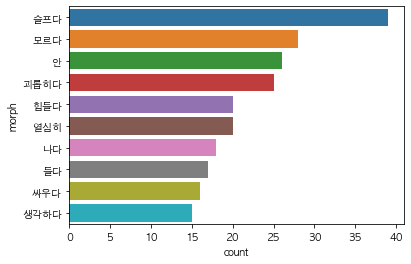

In [107]:
sns.barplot(data=sad_df.loc['청소년', 'count'], x='count', y='morph', 
            orient='h')

<AxesSubplot:xlabel='count', ylabel='morph'>

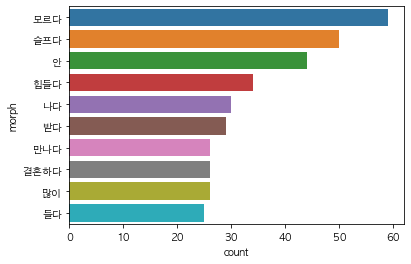

In [108]:
sns.barplot(data=sad_df.loc['청년', 'count'], x='count', y='morph', 
            orient='h')

<AxesSubplot:xlabel='count', ylabel='morph'>

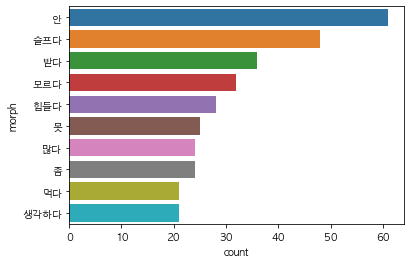

In [109]:
sns.barplot(data=sad_df.loc['중년', 'count'], x='count', y='morph', 
            orient='h')

<AxesSubplot:xlabel='count', ylabel='morph'>

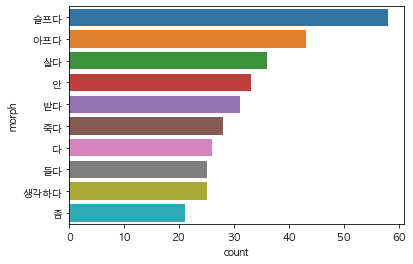

In [110]:
sns.barplot(data=sad_df.loc['노년', 'count'], x='count', y='morph', 
            orient='h')

### 결론 - 기쁨
1. 청소년
    - 공부를 열심히 하거나, 성적이 잘 나오면 기쁘다 라고 표현
    - 친구와 같이(NNP, NNG)
    - 
2. 청년
    - 만남에서 행복, 드디어 결혼해서 행복
    - 친구와 함께(NNP, NNG)
3. 장년
    - 열심히 일하고, 아마도 돈?? 많이 받으면 행복
    - 노후가 가장 큰 이슈(NNP, NNG)
    - 의외로 돈이라는 단어는 후순위(NNP, NNG)
4. 노년
    - 건강하고 오래 살아서 기쁘고, 고마움을 느끼면서 행복을 느낌
    - 경제적 자유가 부족함. 돈이 가장 큰 이슈(NNP, NNG)

### 결론 - 슬픔
1. 청소년
    - 친구, 엄마, 선생, 학교 등 관계에서 슬픔을 많이 표현. 의외로 학업은 뒤에.
    - 괴롭힘이나 자신의 마음을 몰라줄 때
    
2. 청년
    - 친구, 직업, 직장에서의 고충
    - 마음을 몰라주는데서 상처가 큼
3. 장년
    - 아들, 회사, 돈에 의존함. 노후 보장은 순위가 높지 않음.
4. 노년
    - 돈, 친구, 자식 때문에 속앓이
    - 아프고 사는게 힘들게 느껴짐. 죽음에 대한 두려움도.

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", 
                "사람", "이", "보다", " 한", "때", "년", "같다", "대하다", 
                "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다",
                " 받다", "그렇다", "알다", "사회", "더", "그녀", "문제", 
                "오다", "그리고", "크다", "속", "너무"]

grouped = age_df.groupby(by='연령').sum()
grouped

# age_dict[key] = pd.DataFrame(Counter(dummy).most_common(numlim),
#                                 columns=['morph', 'count'])

age_dict = {}
for i, idx in enumerate(grouped.index):
    age_dict[idx] = Counter(grouped['pos'][i])

In [ ]:
sum_ll = []
for name, value in age_dict.items():
    dummy = [(name, pos, count) for pos, count in value.items()]
    sum_ll += dummy

result_df = pd.DataFrame(sum_ll, columns=['연령', 'pos', 'count'])

In [ ]:
IC['ratio'] = result_df['연령'] == 
# IC = result_df[result_df['pos'] == 'IC']
# IC['ratio']
# sns.barplot(data=IC, x='pos', y='count', hue='연령')
# plt.show()

In [ ]:
%matplotlib inline
plt.figure()
sns.barplot(data=result_df, x='pos', y='count', hue='연령')

In [ ]:
new = result_df.groupby(by=['pos', '연령']).sum()
sns.barplot(data=new, x='pos', y='count', hue='연령')

In [ ]:
# 청소년 형태소 비율
youth_list = [(key, value) for key, value in age_dict['청소년'].items()]
youth_df = pd.DataFrame(youth_list, columns=['pos', 'count'])
youth_df.sort_values('count', inplace=True, ascending=False)
youth_df['ratio'] = youth_df['count'].apply(lambda x: x/sum(youth_df['count']))
sns.barplot(data=youth_df, x='pos', y='ratio')
plt.show()

In [ ]:
# 청년 형태소 비율
youth_list = [(key, value) for key, value in age_dict['청년'].items()]
youth_df = pd.DataFrame(youth_list, columns=['pos', 'count'])
youth_df.sort_values('count', inplace=True, ascending=False)
youth_df['ratio'] = youth_df['count'].apply(lambda x: x/sum(youth_df['count']))
sns.barplot(data=youth_df, x='pos', y='ratio')
plt.show()

In [ ]:
# 중년 형태소 비율
youth_list = [(key, value) for key, value in age_dict['중년'].items()]
youth_df = pd.DataFrame(youth_list, columns=['pos', 'count'])
youth_df.sort_values('count', inplace=True, ascending=False)
youth_df['ratio'] = youth_df['count'].apply(lambda x: x/sum(youth_df['count']))
sns.barplot(data=youth_df, x='pos', y='ratio')
plt.show()

In [ ]:
# 노년 형태소 비율
youth_list = [(key, value) for key, value in age_dict['노년'].items()]
youth_df = pd.DataFrame(youth_list, columns=['pos', 'count'])
youth_df.sort_values('count', inplace=True, ascending=False)
youth_df['ratio'] = youth_df['count'].apply(lambda x: x/sum(youth_df['count']))
sns.barplot(data=youth_df, x='pos', y='ratio')
plt.show()

In [ ]:
youth_df.count.sum()

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=(10, 8))
# dict_keys(['청년', '노년', '중년', '청소년'])
plt.figure(figsize=(10,8))
sns.barplot(data=age_dict['청소년'], x='count', y='morph', orient='h')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=(10, 8))
# dict_keys(['청년', '노년', '중년', '청소년'])
plt.figure(figsize=(10,8))
sns.barplot(data=age_dict['청년'], x='count', y='morph', orient='h')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=(10, 8))
# dict_keys(['청년', '노년', '중년', '청소년'])
plt.figure(figsize=(10,8))
sns.barplot(data=age_dict['중년'], x='count', y='morph', orient='h')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=(10, 8))
# dict_keys(['청년', '노년', '중년', '청소년'])
plt.figure(figsize=(10,8))
sns.barplot(data=age_dict['노년'], x='count', y='morph', orient='h')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=(10, 8))
# dict_keys(['청년', '노년', '중년', '청소년'])
plt.figure(figsize=(10,8))
sns.barplot(data=age_dict['노년'], x='count', y='morph', orient='h')
plt.xticks(fontsize=13)
plt.show()